In [1]:
import pandas as pd
import numpy as np #provides a few math functions
import matplotlib.pyplot as plt #plot data or make graphs
import seaborn as sns #another visual package\


In [2]:
import scipy.stats as stats #statistics analysis functions
import statsmodels.api as sm # " "

#Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
file_path = 'housing.csv'

data = pd.read_csv(file_path)

In [4]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [8]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [12]:
missing_values = data.isnull().sum() #put the sum of all missing vals in a variable

#calculate the percentage of missing data in each column
missing_percentage = (missing_values / len(data)) * 100

#display the missing value data statistics\
print("missing values in each column:\n", missing_values)
print("percentage of missing data:\n", missing_percentage)

missing values in each column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
percentage of missing data:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [13]:
#remove rows with missing values
data_cleaned = data.dropna()

#verify that missing values have been removed
print("\nData after missing values have been removed:")
print(data_cleaned.isnull().sum())


Data after missing values have been removed:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [14]:
data_cleaned.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


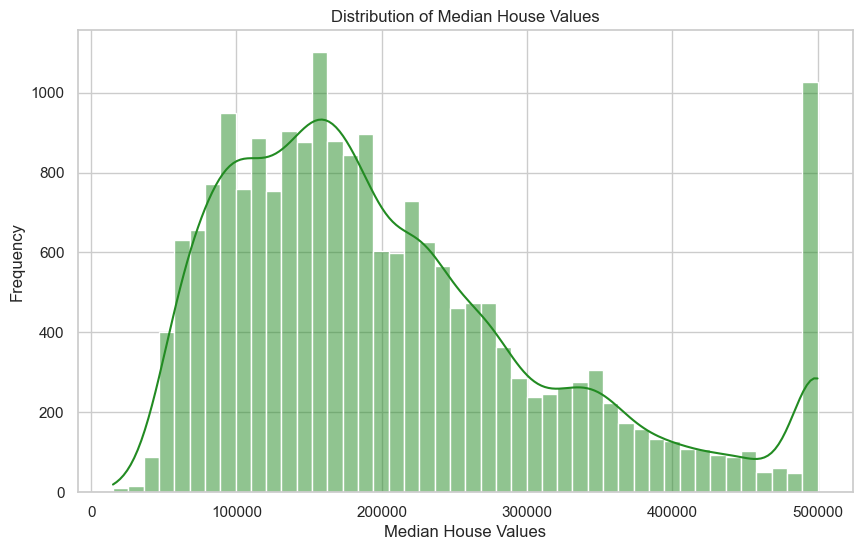

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned["median_house_value"], color="forestgreen", kde=True)
plt.title("Distribution of Median House Values")
plt.xlabel("Median House Values")
plt.ylabel("Frequency")
plt.show()

In [21]:
#using iqr to remove outliers
#assuming data_cleaned is out data fram and 'median_house_value' is the column of interest
Q1 = data_cleaned["median_house_value"].quantile(0.25)
Q3 = data_cleaned["median_house_value"].quantile(0.75)
#iqr
IQR = Q3 - Q1

#define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [22]:
print(Q1)
print(Q3)

119500.0
264700.0


In [23]:
#remove outliers
data_no_outliers = data_cleaned[(data_cleaned['median_house_value'] >= lower_bound) & (data_cleaned['median_house_value'] <= upper_bound)]

In [25]:
#check the shape of the data before and after the removing outliers
print("original shape: ", data_cleaned.shape)
print("outliers removed new shape: ", data_no_outliers.shape)

original shape:  (20433, 10)
outliers removed new shape:  (19369, 10)


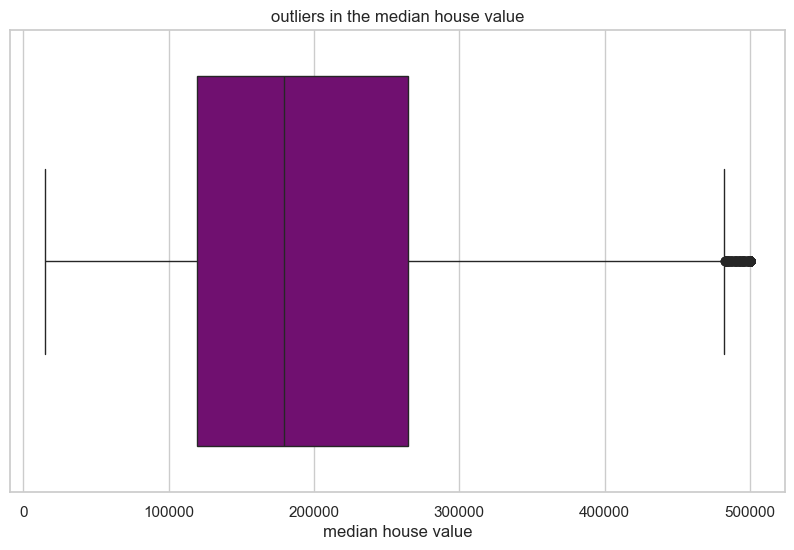

In [28]:
#box plot for outlier detection

plt.figure(figsize=(10,6))
sns.boxplot(x=data_cleaned["median_house_value"], color='purple')
plt.title("outliers in the median house value")
plt.xlabel("median house value")
plt.show()

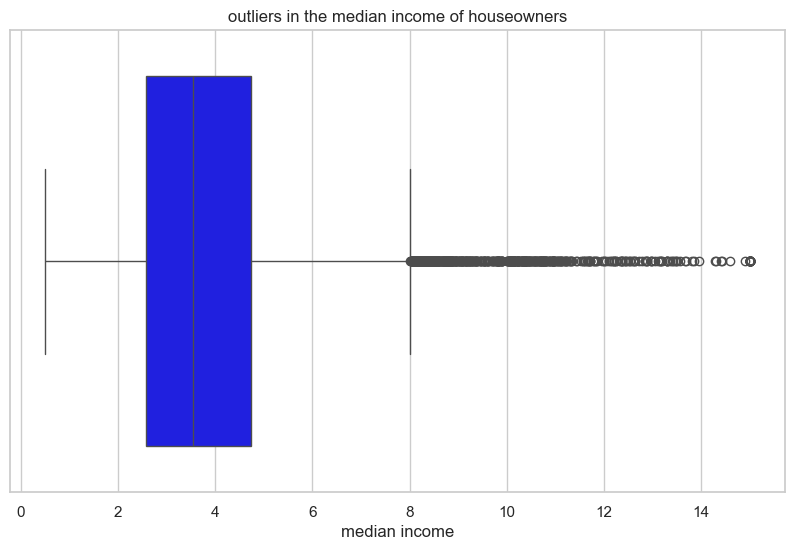

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data_cleaned["median_income"], color='blue')
plt.title("outliers in the median income of houseowners")
plt.xlabel("median income")
plt.show()

In [32]:
#using iqr to remove outliers
#assuming data_cleaned is out data fram and 'median_house_value' is the column of interest
Q1 = data_cleaned["median_income"].quantile(0.25)
Q3 = data_cleaned["median_income"].quantile(0.75)
#iqr
IQR = Q3 - Q1

#define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_no_outliers_income = data_cleaned[(data_cleaned['median_income'] >= lower_bound) & (data_cleaned['median_income'] <= upper_bound)]

print("original shape: ", data_cleaned.shape)
print("outliers removed new shape: ", data_no_outliers_income.shape)

original shape:  (20433, 10)
outliers removed new shape:  (19763, 10)
